In [25]:
!pip install augmentts

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from Data_Augmentation.vpower_src.utils.auxiliary_functions import *

from augmentts.augmenters.vae import LSTMVAE, VAEAugmenter
from augmentts.forecasters.deep import LSTMCNNForecaster
from augmentts.utils import prepare_ts


In [27]:
torch.cuda.is_available()

True

In [28]:
#data_dir_s =  "../../Data/synthetic_data"
data_dir_r =  "../../Data/split_quad"
#data_dir_da = "../../Data/augmented_data"
#data_tag="RD"

In [29]:
data_all = {}

for partition in ["train", "test", "val", "lourd"]:
    df = load_data_and_set_index(filepath=os.path.join(data_dir_r, f"{partition}.csv"), index_column_name="index")
    data_all[partition+"_r"] = df

data_all["train"]=data_all["train_r"]
data_all["test"]=data_all["test_r"]

In [30]:
input_features = [
    #time_start,
    "flight",
    "time",
    "wind_speed",
    "wind_angle",
    #battery_voltage,
    #battery_current,
    #position_x,
    #position_y,
    "position_z",
    "orientation_x",
    "orientation_y",
    "orientation_z",
    "orientation_w",
    "velocity_x",
    "velocity_y",
    "velocity_z",
    "angular_x",
    "angular_y",
    "angular_z",
    "linear_acceleration_x",
    "linear_acceleration_y",
    "linear_acceleration_z",
    #speed,
    #payload,
    #altitude,
    #route,
    #power,
    "power_smoothed"
]


In [31]:
data_all_features = {}
data_all_features["train"] = pd.DataFrame(data_all["train"][input_features])
data_all_features["test"] = pd.DataFrame(data_all["test"][input_features])

In [32]:
real_data = data_all_features["train"]
print("Real_Data Length: ", len(real_data))

Real_Data Length:  139006


In [33]:
# Create variational autoencoder
vae = LSTMVAE(series_len=19)

# Create an augmenter
augmenter = VAEAugmenter(vae)


In [48]:
# 12min pour epoch = 50, batch_size = 1000

#augmenter.fit(np.random.normal(size=(40,1,100)), epochs=10, batch_size=32)
real_data_reshape = real_data.values.reshape(-1, 1, 19)
print(real_data_reshape.shape)
augmenter.fit(real_data_reshape, epochs=50, batch_size=1000)

(139006, 1, 19)
Epoch 1/50
140/140 [==============================] - 15s 104ms/step - loss: 3907788.4628 - reconstruction_loss: 3764152.2500 - kl_loss: 0.0126
Epoch 2/50
140/140 [==============================] - 15s 104ms/step - loss: 3454757.5284 - reconstruction_loss: 3327232.5000 - kl_loss: 0.0126
Epoch 3/50
140/140 [==============================] - 14s 103ms/step - loss: 3076127.9078 - reconstruction_loss: 2981164.5000 - kl_loss: 0.0127
Epoch 4/50
140/140 [==============================] - 15s 104ms/step - loss: 2780157.8440 - reconstruction_loss: 2700474.5000 - kl_loss: 0.0127
Epoch 5/50
140/140 [==============================] - 14s 102ms/step - loss: 2544633.7730 - reconstruction_loss: 2470510.0000 - kl_loss: 0.0127
Epoch 6/50
140/140 [==============================] - 14s 103ms/step - loss: 2338412.6578 - reconstruction_loss: 2281982.5000 - kl_loss: 0.0127
Epoch 7/50
140/140 [==============================] - 14s 103ms/step - loss: 2175145.0390 - reconstruction_loss: 2128258

In [59]:
new_data1 = augmenter.sample(n=140000)

In [60]:
new_data2 = augmenter.sample(X=real_data_reshape)

(139006, 1, 19)
(139006, 1, 19)


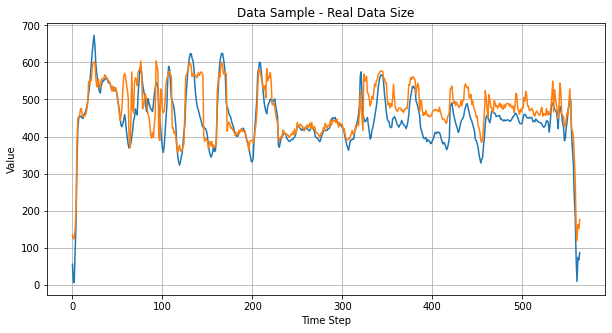

(140000, 1, 19)


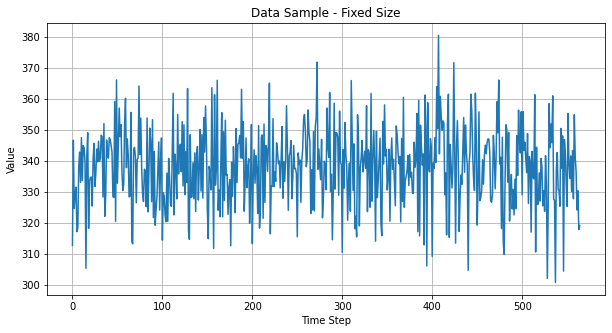

'\ntensor1 = tf.constant(new_data1)\ndata_array1 = tensor1.numpy()\ndata_to_plot1 = data_array1[:100, :, 0]\ndata_to_plot1 = data_to_plot1.squeeze()\nx_values1 = range(data_to_plot1.shape[0])\n\nplt.figure(figsize=(10,5))\nplt.plot(x_values1, data_to_plot1)\nplt.xlabel("Time Step")\nplt.ylabel("Value")\nplt.title("Data Sample - Fixed Size")# + str(new_data1.shape))\nplt.grid(True)\nplt.show()\n'

In [83]:
import tensorflow as tf

number_of_samples_start = 2425
number_of_samples_stop = 2990

print(real_data_reshape.shape)
tensor0 = tf.constant(real_data_reshape)
data_array0 = tensor0.numpy()
data_to_plot0 = data_array0[number_of_samples_start:number_of_samples_stop, :, 18]
data_to_plot0 = data_to_plot0.squeeze()
x_values0 = range(data_to_plot0.shape[0])

plt.figure(figsize=(10,5))
plt.plot(x_values0, data_to_plot0)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Real Data")# +str(real_data_reshape.shape))
plt.grid(True)
#plt.show()


print(new_data2.shape)
tensor2 = tf.constant(new_data2)
data_array2 = tensor2.numpy()
data_to_plot2 = data_array2[number_of_samples_start:number_of_samples_stop, :, 18]
data_to_plot2 = data_to_plot2.squeeze()
x_values2 = range(data_to_plot2.shape[0])

#plt.figure(figsize=(10,5))
plt.plot(x_values2, data_to_plot2)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Data Sample - Real Data Size")# + str(new_data2.shape))
plt.grid(True)
plt.show()


print(new_data1.shape)
tensor1 = tf.constant(new_data1)
data_array1 = tensor1.numpy()
data_to_plot1 = data_array1[number_of_samples_start:number_of_samples_stop, :, 18]
data_to_plot1 = data_to_plot1.squeeze()
x_values1 = range(data_to_plot1.shape[0])

plt.figure(figsize=(10,5))
plt.plot(x_values1, data_to_plot1)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Data Sample - Fixed Size") # + str(new_data1.shape))
plt.grid(True)
plt.show()


In [ ]:
data_array2[:,:,18]

array([[77.07006],
       [77.06978],
       [77.07022],
       ...,
       [77.06985],
       [77.07038],
       [77.07015]], dtype=float32)

In [ ]:
input_features[18]

'power_smoothed'

In [95]:
data_flight_get = new_data2[2425:2990,:,:].numpy().squeeze()
data_flight_get = pd.DataFrame(data_flight_get)
data_flight_get.columns = input_features

data_flight_get

,flight,time,wind_speed,wind_angle,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,power_smoothed
0,73.381729,64.789886,1.329616,27.121876,146.856323,0.042165,-0.031642,-0.496137,0.411925,-0.135744,-0.716488,-0.119399,-0.089360,-0.134104,0.074834,0.295996,-0.291388,-9.865865,135.154449
1,69.084869,61.628422,1.218963,24.215422,137.760651,0.037819,-0.004448,-0.490208,0.379248,-0.146644,-0.870871,-0.090794,-0.080469,-0.127677,0.147180,0.298616,-0.313682,-9.721917,123.749916
2,69.401138,61.473595,1.255127,25.089760,138.404404,0.041477,0.002598,-0.480520,0.383838,-0.139059,-0.826640,-0.093125,-0.066002,-0.119185,0.142744,0.281020,-0.307537,-9.678682,126.019791
3,78.104240,67.822487,1.492604,31.093151,156.916367,0.043006,-0.029622,-0.461087,0.461784,-0.110151,-0.488190,-0.147935,-0.053889,-0.105148,-0.011893,0.269954,-0.237930,-9.896068,149.632233
4,91.251816,74.004158,2.227228,45.174843,184.856308,0.004206,0.030055,-0.329919,0.571786,-0.005566,0.394475,-0.264610,0.068228,0.052141,-0.082672,0.084709,-0.022247,-9.790984,198.091812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,81.308945,69.407883,1.649353,34.471539,163.690308,0.041521,-0.011119,-0.421610,0.492559,-0.088685,-0.293415,-0.167233,-0.017563,-0.065948,-0.045638,0.229211,-0.184870,-9.870646,161.111832
561,66.682281,59.496765,1.184120,23.260225,132.725311,0.037430,0.021884,-0.470858,0.371542,-0.140561,-0.909341,-0.078040,-0.050997,-0.111989,0.174064,0.282542,-0.316146,-9.548506,118.935562
562,81.603027,69.530861,1.666711,34.805637,164.304871,0.040429,-0.010122,-0.420459,0.494822,-0.086438,-0.274251,-0.169483,-0.015582,-0.062560,-0.046690,0.224645,-0.179999,-9.868608,162.223083
563,78.715424,68.006416,1.531427,31.909485,158.179443,0.044172,-0.024620,-0.453933,0.465776,-0.105756,-0.444062,-0.151832,-0.046655,-0.096636,-0.013327,0.256379,-0.228215,-9.887236,152.191101


In [103]:
data_flight_get.loc[:,"flight"] = 300
data_flight_get.loc[:,"time"] = [x * 0.1 for x in range(data_flight_get.shape[0])]
data_flight_get

,flight,time,wind_speed,wind_angle,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,power_smoothed
0,300,0.0,1.329616,27.121876,146.856323,0.042165,-0.031642,-0.496137,0.411925,-0.135744,-0.716488,-0.119399,-0.089360,-0.134104,0.074834,0.295996,-0.291388,-9.865865,135.154449
1,300,0.1,1.218963,24.215422,137.760651,0.037819,-0.004448,-0.490208,0.379248,-0.146644,-0.870871,-0.090794,-0.080469,-0.127677,0.147180,0.298616,-0.313682,-9.721917,123.749916
2,300,0.2,1.255127,25.089760,138.404404,0.041477,0.002598,-0.480520,0.383838,-0.139059,-0.826640,-0.093125,-0.066002,-0.119185,0.142744,0.281020,-0.307537,-9.678682,126.019791
3,300,0.3,1.492604,31.093151,156.916367,0.043006,-0.029622,-0.461087,0.461784,-0.110151,-0.488190,-0.147935,-0.053889,-0.105148,-0.011893,0.269954,-0.237930,-9.896068,149.632233
4,300,0.4,2.227228,45.174843,184.856308,0.004206,0.030055,-0.329919,0.571786,-0.005566,0.394475,-0.264610,0.068228,0.052141,-0.082672,0.084709,-0.022247,-9.790984,198.091812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,300,56.0,1.649353,34.471539,163.690308,0.041521,-0.011119,-0.421610,0.492559,-0.088685,-0.293415,-0.167233,-0.017563,-0.065948,-0.045638,0.229211,-0.184870,-9.870646,161.111832
561,300,56.1,1.184120,23.260225,132.725311,0.037430,0.021884,-0.470858,0.371542,-0.140561,-0.909341,-0.078040,-0.050997,-0.111989,0.174064,0.282542,-0.316146,-9.548506,118.935562
562,300,56.2,1.666711,34.805637,164.304871,0.040429,-0.010122,-0.420459,0.494822,-0.086438,-0.274251,-0.169483,-0.015582,-0.062560,-0.046690,0.224645,-0.179999,-9.868608,162.223083
563,300,56.3,1.531427,31.909485,158.179443,0.044172,-0.024620,-0.453933,0.465776,-0.105756,-0.444062,-0.151832,-0.046655,-0.096636,-0.013327,0.256379,-0.228215,-9.887236,152.191101


In [107]:
data_flight_get.to_csv("da.csv", index=False)


## Fitting with unique flights
We can just take the one trained with all the flights and select only one or multiple flights

In [62]:
# number of samples to generate and to plot
flight_unique = 1
number_of_samples_unique = 1000

In [63]:
# Create variational autoencoder
vae_unique = LSTMVAE(series_len=19)

# Create an augmenter
augmenter_unique = VAEAugmenter(vae_unique)

In [64]:
df = real_data

flight_data_list = []

for n, g in df.groupby('flight'):
    flight_data_list.append(g)

flight_data_list[flight_unique]

,flight,time,wind_speed,wind_angle,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,power_smoothed
index,,,,,,,,,,,,,,,,,,,
1531,2,0.00,1.1,178.0,268.830833,-0.000779,0.005692,0.298475,0.954400,-0.009233,0.000215,0.007667,-0.001621,-0.001778,0.005457,0.020363,-0.113653,-9.802392,10.121494
1532,2,0.10,1.2,173.0,268.825543,-0.000763,0.005683,0.298431,0.954414,-0.014337,0.006044,0.012726,-0.002207,0.000437,0.002690,0.033018,-0.122272,-9.806426,656.341326
1534,2,0.40,1.2,160.0,268.823417,-0.001039,0.005962,0.298334,0.954442,-0.009544,-0.003069,0.013195,-0.008197,0.002018,0.003247,0.000986,-0.089019,-9.812296,6.626053
1537,2,0.90,1.2,140.0,268.816496,-0.000988,0.005943,0.298793,0.954299,-0.003808,0.003627,0.012397,0.027525,0.011147,0.017698,-0.010925,-0.175111,-9.801626,6.442344
1539,2,1.10,1.3,132.0,268.811814,-0.000966,0.005864,0.298762,0.954309,0.001435,-0.004404,0.016052,-0.005660,0.000463,-0.019663,0.018311,-0.086484,-9.810189,82.149147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,2,194.30,1.5,175.0,268.608019,-0.005952,-0.005591,0.936295,0.351119,0.102722,0.023101,-0.183160,-0.003423,-0.009436,-0.008189,-0.060829,-0.168245,-9.809832,52.840086
2829,2,194.70,1.5,171.0,268.672543,-0.004961,-0.005939,0.936330,0.351037,0.053321,0.012981,-0.139084,-0.007100,0.000749,-0.001962,-0.103017,-0.108654,-9.789060,63.394503
2830,2,194.80,1.5,163.0,268.658573,-0.004815,-0.005878,0.936342,0.351006,0.049331,0.017661,-0.139650,-0.012181,0.011000,0.006502,-0.091881,-0.102067,-9.806318,59.285730


In [65]:
real_data_reshape_unique = flight_data_list[flight_unique].values.reshape(-1, 1, 19)
print(real_data_reshape_unique.shape)
augmenter_unique.fit(real_data_reshape_unique, epochs=50, batch_size=1000)

(939, 1, 19)
Epoch 1/50
1/1 [==============================] - 0s 155ms/step - loss: 18362840.0000 - reconstruction_loss: 18362840.0000 - kl_loss: 1.6247e-07
Epoch 2/50
1/1 [==============================] - 0s 106ms/step - loss: 18362400.0000 - reconstruction_loss: 18362400.0000 - kl_loss: 5.0102e-07
Epoch 3/50
1/1 [==============================] - 0s 104ms/step - loss: 18361922.0000 - reconstruction_loss: 18361922.0000 - kl_loss: 1.2761e-06
Epoch 4/50
1/1 [==============================] - 0s 101ms/step - loss: 18361408.0000 - reconstruction_loss: 18361408.0000 - kl_loss: 2.5849e-06
Epoch 5/50
1/1 [==============================] - 0s 105ms/step - loss: 18360828.0000 - reconstruction_loss: 18360828.0000 - kl_loss: 4.6272e-06
Epoch 6/50
1/1 [==============================] - 0s 107ms/step - loss: 18360226.0000 - reconstruction_loss: 18360226.0000 - kl_loss: 7.7507e-06
Epoch 7/50
1/1 [==============================] - 0s 104ms/step - loss: 18359478.0000 - reconstruction_loss: 18359478

In [66]:
new_data1_unique = augmenter_unique.sample(n=number_of_samples_unique)

In [67]:
new_data2_unique = augmenter_unique.sample(X=real_data_reshape_unique)

(939, 1, 19)


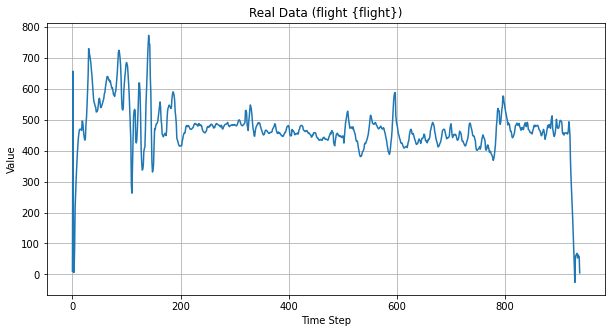

(939, 1, 19)


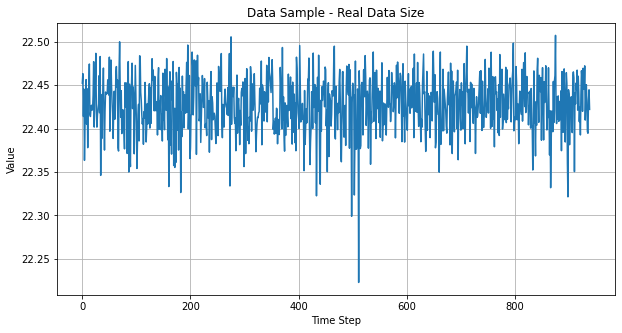

(1000, 1, 19)


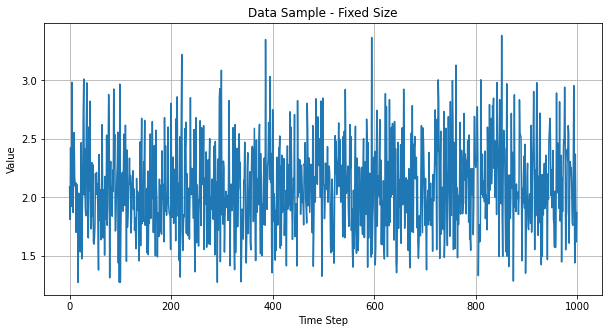

In [68]:
import tensorflow as tf

number_of_samples_start_unique = 0
number_of_samples_stop_unique = 1000

print(real_data_reshape_unique.shape)
tensor0_unique = tf.constant(real_data_reshape_unique)
data_array0_unique = tensor0_unique.numpy()
data_to_plot0_unique = data_array0_unique[number_of_samples_start_unique:number_of_samples_stop_unique, :, 18]
data_to_plot0_unique = data_to_plot0_unique.squeeze()
x_values0_unique = range(data_to_plot0_unique.shape[0])

plt.figure(figsize=(10,5))
plt.plot(x_values0_unique, data_to_plot0_unique)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Real Data (flight {flight})")# +str(real_data_reshape.shape))
plt.grid(True)
plt.show()


print(new_data2_unique.shape)
tensor2_unique = tf.constant(new_data2_unique)
data_array2_unique = tensor2_unique.numpy()
data_to_plot2_unique = data_array2_unique[number_of_samples_start_unique:number_of_samples_stop_unique, :, 18]
data_to_plot2_unique = data_to_plot2_unique.squeeze()
x_values2_unique = range(data_to_plot2_unique.shape[0])

plt.figure(figsize=(10,5))
plt.plot(x_values2_unique, data_to_plot2_unique)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Data Sample - Real Data Size")# + str(new_data2.shape))
plt.grid(True)
plt.show()


print(new_data1_unique.shape)
tensor1_unique = tf.constant(new_data1_unique)
data_array1_unique = tensor1_unique.numpy()
data_to_plot1_unique = data_array1_unique[number_of_samples_start_unique:number_of_samples_stop_unique, :, 18]
data_to_plot1_unique = data_to_plot1_unique.squeeze()
x_values1_unique = range(data_to_plot1_unique.shape[0])

plt.figure(figsize=(10,5))
plt.plot(x_values1_unique, data_to_plot1_unique)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Data Sample - Fixed Size") # + str(new_data1.shape))
plt.grid(True)
plt.show()